<a href="https://colab.research.google.com/github/SujayDas1999/Neural-network/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
Find gradient descent for 3X**2 - 3X + 4
df/dx(x) = 6X - 3
'''
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipython-input-2677962656.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
def fx(x):
  return 3*x**2 - 3*x + 4

def deriv(x):
  return 6*x - 3

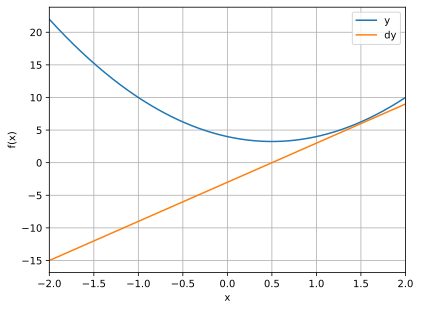

In [4]:
x = np.linspace(-2,2,2001)

plt.plot(x,fx(x), x, deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [32]:
localmin = np.random.choice(x,1)

learning_rate = 0.1
training_epochs = 100

for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

array([0.5])

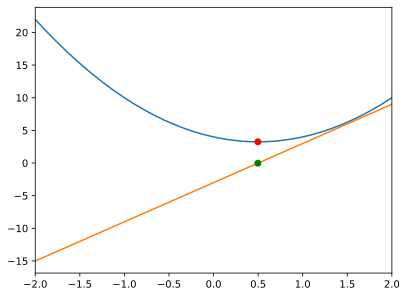

In [20]:
plt.plot(x,fx(x),x,deriv(x))
plt.plot(localmin,deriv(localmin),'go')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.show()

In [37]:
localmin = np.random.choice(x,1)

learning_rate = 0.01

while True:
  gradient = deriv(localmin)
  localmin = localmin - learning_rate*gradient
  if abs(gradient) <= 0.1:
    break;

localmin

array([0.48507234])

In [36]:
'''
Code exercise -
Find the gradient descent of the following equation -
cos(2piX) + x^2
'''

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,2001)


def fX(x):
  return np.cos(2*3.14*x) + x**2

def derivC(x):
  return -2*3.14*np.sin(2*3.14*x) + 2*x


local_min = np.random.choice(x,1)
learning_rate = 0.01
training_epochs = 100

for i in range(training_epochs):
  grad = derivC(local_min)
  local_min = local_min - learning_rate*grad

local_min


array([-0.47602024])

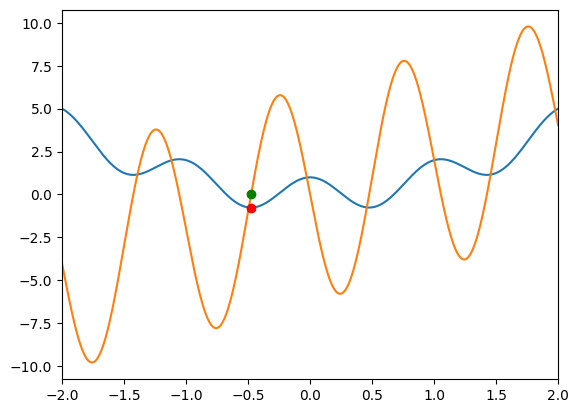

In [25]:
plt.plot(x,fX(x),x,derivC(x))
plt.plot(local_min,derivC(local_min),'go')
plt.plot(local_min,fX(local_min),'ro')
plt.xlim(x[[0,-1]])
plt.show()

2D Gradient Descent

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [52]:
# the "peaks" function
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

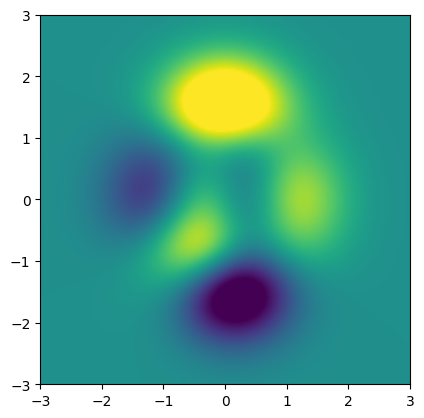

In [53]:
# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [54]:
sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

In [73]:

# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = [0,-2.4] #localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = -1 * np.array([ df_x(localmin[0],localmin[1]).evalf(),
                    df_y(localmin[0],localmin[1]).evalf()
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[-0.00931758195995413 1.58136796293900]
[0, -2.4]


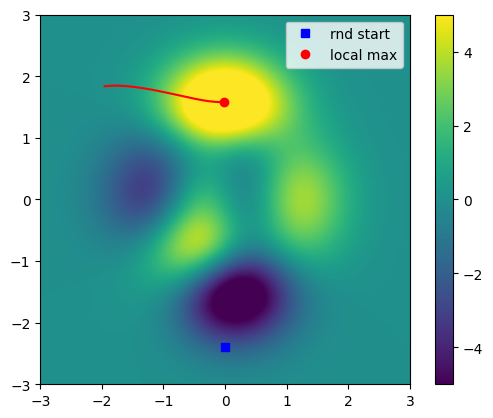

In [75]:
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local max'])
plt.colorbar()
plt.show()

In [76]:
'''
Experimentation with gradient descent parameters
'''

import numpy as np
import matplotlib.pyplot as plt

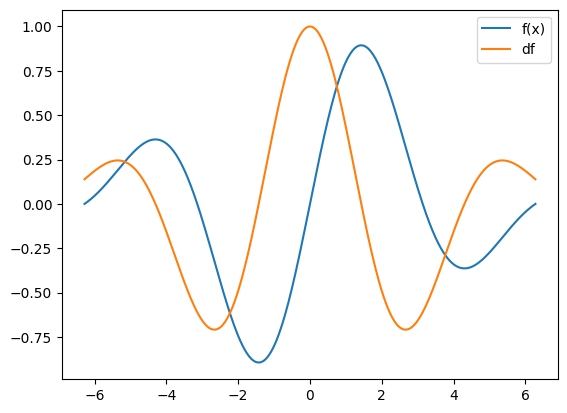

In [79]:
x = np.linspace(-2*np.pi, 2*np.pi, 401)
fx = np.sin(x) * np.exp(-x**2*.05)

df = np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*0.05)

plt.plot(x,fx,x,df)
plt.legend(['f(x)','df'])

In [80]:
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

def deriv(x):
  return np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*0.05)

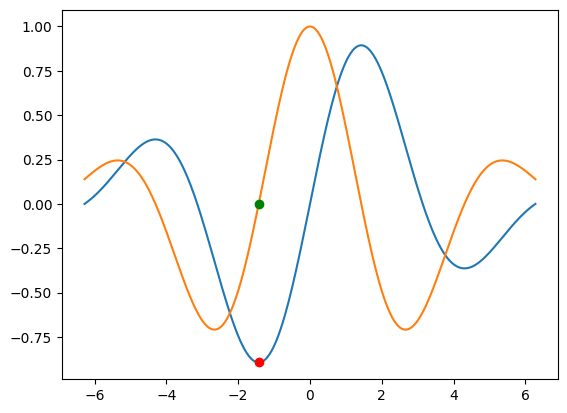

In [94]:
local_min = np.random.choice(x,1)

learning_rate = 0.01
epochs = 1000

for i in range(epochs):
  grad = deriv(local_min)
  local_min = local_min - learning_rate * grad
local_min

plt.plot(x,fx(x),x,deriv(x))
plt.plot(local_min, fx(local_min), 'ro')
plt.plot(local_min, deriv(local_min), 'go')